In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
df.shape

(7043, 21)

In [38]:
#df.describe()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [40]:
# Encoding columns as part of transformation.
from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

#df_new=le.fit_transform(df)

df['customerID'] = le.fit_transform(df['customerID'])
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])

df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['TotalCharges'] = le.fit_transform(df['TotalCharges'])
df['Churn'] = le.fit_transform(df['Churn'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [42]:
df['PhoneService'].unique()

array([0, 1])

In [43]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)

Churn               0
OnlineSecurity      0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineBackup        0
TotalCharges        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
customerID          0
dtype: int64

In [44]:
# Checking the zscore in order to normalize the data.
from scipy.stats import zscore
z= np.abs(zscore(df))
z

array([[0.91189045, 1.00955867, 0.43991649, ..., 1.16032292, 0.39860759,
        0.60102348],
       [0.21690598, 0.99053183, 0.43991649, ..., 0.25962894, 0.94876238,
        0.60102348],
       [0.47070074, 0.99053183, 0.43991649, ..., 0.36266036, 1.64188328,
        1.66382851],
       ...,
       [0.07574495, 1.00955867, 0.43991649, ..., 1.1686319 , 0.13968008,
        0.60102348],
       [1.18683477, 0.99053183, 2.27315869, ..., 0.32033821, 0.31653445,
        1.66382851],
       [0.63694614, 0.99053183, 0.43991649, ..., 1.35896134, 1.13801338,
        0.60102348]])

In [45]:
# Verifying for the presence of zscore value of data with threshold of more than 3 std score.

threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [46]:
# Removing the outliers having zscore value of more than 3.
customer_data=df[(z<3).all(axis=1)]
customer_data.shape

(6361, 21)

In [47]:
# Checking for skewed data
customer_data.skew()

customerID          0.006843
gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
Churn               1.053055
dtype: float64

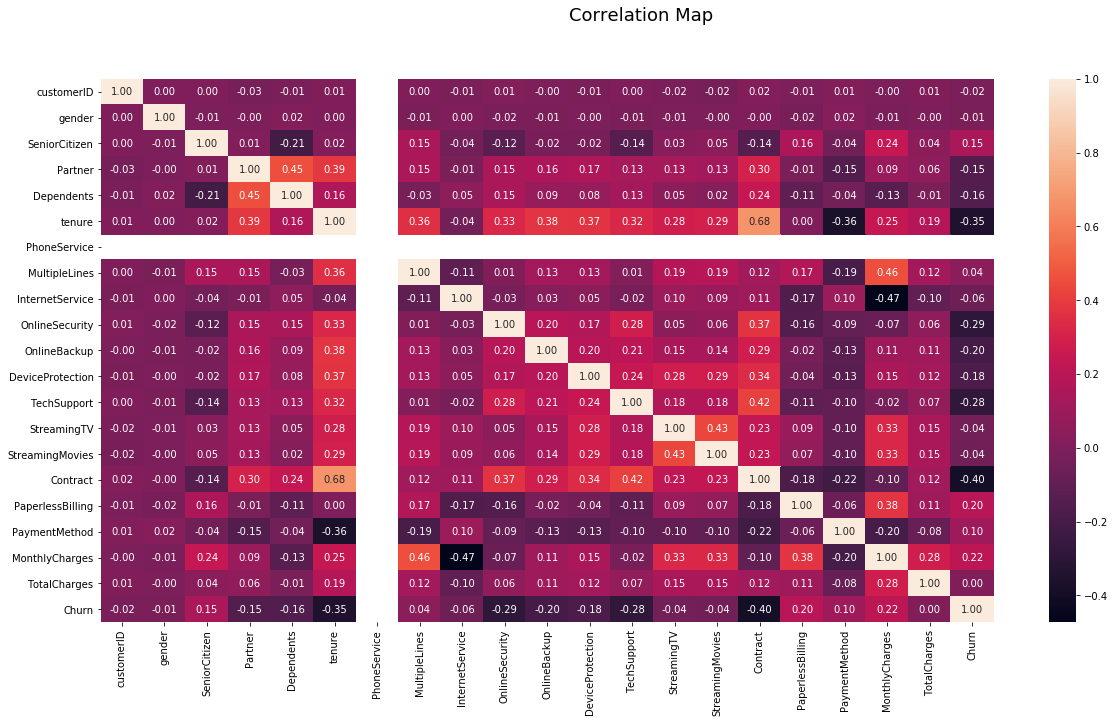

In [48]:
plt.figure(figsize=(20,10)) 
sns.heatmap(customer_data.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

In [49]:
#Phone Service can be dropped
customer_data['PhoneService'].unique()

array([1])

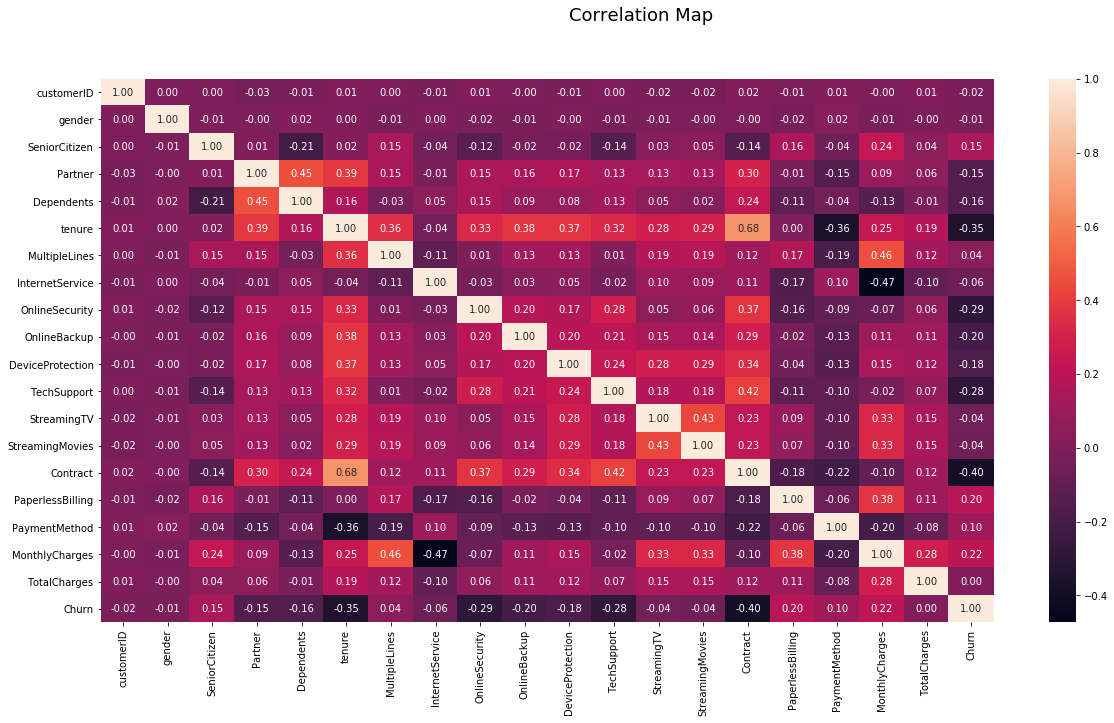

In [50]:
# Dropping PhoneService from the dataset.
customer_data.drop(['PhoneService'],axis=1, inplace=True)


plt.figure(figsize=(20,10)) 
sns.heatmap(customer_data.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

In [51]:
# Setting x  by excluding fraud_reported column which is y here for prediction.
x=customer_data.drop(['Churn'],axis=1)
x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,3962,1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,2564,1,0,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,157
4,6511,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,925
5,6551,0,0,0,0,8,2,1,0,0,2,0,2,2,0,1,2,99.65,6104
6,1002,1,0,0,1,22,2,1,0,2,0,0,2,0,0,1,1,89.10,1550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758,0,0,0,0,72,0,2,1,1,1,1,1,1,2,1,0,21.15,770
7038,4853,1,0,1,1,24,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,1525,0,0,1,1,72,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7041,5934,1,1,1,0,4,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scale = StandardScaler()
scale = MinMaxScaler()
x=scale.fit_transform(x)

In [53]:
# Settng Y
y=customer_data['Churn']
y

1       0
2       1
4       1
5       1
6       0
       ..
7037    0
7038    0
7039    0
7041    1
7042    0
Name: Churn, Length: 6361, dtype: int32

In [54]:
max_acc_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    accuracyScore=accuracy_score(test_y,pred)
    #print("Accuracy_Score corresponding to r_state: ",r_state," is ",accuracyScore)
    if(accuracyScore>max_acc_score):
        max_acc_score=accuracyScore
        final_rstate=r_state
        
print("\n\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_acc_score)




Max_accuracy_Score corresponding to final_r_state:  49  is  0.8221244500314268


In [55]:
# Setting the test x & y values and using the random state from above step which is 49.

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=49)

In [56]:
train_x.shape

(4770, 19)

In [57]:
train_y.shape

(4770,)

In [58]:
test_x.shape

(1591, 19)

In [59]:
test_y.shape

(1591,)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
KNN=KNeighborsClassifier(n_neighbors=13)
SV=SVC(kernel="linear", C=1)
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='entropy',max_depth=4)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100,random_state=100)
ADC=AdaBoostClassifier(n_estimators=100,random_state=10)
GBC=GradientBoostingClassifier(n_estimators=100,random_state=10)

In [62]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('AdaBoostClassifier',ADC))
models.append(('GradientBoostingClassifier',GBC))

In [63]:
Model=[]
score=[]
cvs=[]
rocscore=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    AS=accuracy_score(test_y,pre)
    print("Accuracy Score: ", AS)
    score.append(AS*100)
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print("Cross_Val_Score: ", sc)
    cvs.append(sc*100)
    cm=confusion_matrix(test_y,pre)
    print(cm)
    print("\n")

-------------- KNeighborsClassifier --------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')
Accuracy Score:  0.7793840351979887
Cross_Val_Score:  0.7616744665936042
[[1017  163]
 [ 188  223]]


-------------- SVC --------------
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Score:  0.8233815210559396
Cross_Val_Score:  0.7990869642486894
[[1074  106]
 [ 175  236]]


-------------- LogisticRegression --------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
           

In [64]:
result=pd.DataFrame({"Model": Model, "Score": score, "Cross Val Score":cvs})
result

,Model,Score,Cross Val Score
0,KNeighborsClassifier,77.938404,76.167447
1,SVC,82.338152,79.908696
2,LogisticRegression,82.212445,80.427688
3,DecisionTreeClassifier,78.818353,78.431005
4,GaussianNB,76.492772,75.632584
5,RandomForestClassifier,80.766813,79.389903
6,AdaBoostClassifier,81.081081,79.500138
7,GradientBoostingClassifier,80.955374,80.631893


# From the above table SVC seems to be the best model with over 82% accuracy.

In [65]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
customer_data.to_csv('CustomerChurn_Predict.csv')
predictData

,0
0,0
1,0
2,0
3,0
4,0
...,...
1586,1
1587,0
1588,0
1589,0


In [66]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(SV,"SV_CustomerChurn.pkl")

['SV_CustomerChurn.pkl']